In [21]:
import json
import os, glob

from itertools import product

import numpy as np
import pandas as pd

import torch

import matplotlib.pyplot as plt
import torchaudio
from torchaudio.functional.filtering import lowpass_biquad, highpass_biquad

from matplotlib import rcParams

from collections import defaultdict

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import seaborn as sns
sns.set_style('whitegrid')


In [2]:
dataset_to_visualize = 'fm_toy_dataset'
split_to_visualize = 'train'
data_dir = os.path.join('data', dataset_to_visualize, split_to_visualize, '')

wav_files_dir = os.path.join(data_dir, 'wav_files')
wav_file_paths = glob.glob(os.path.join(wav_files_dir, '*.wav'))

params_csv_path = os.path.join(data_dir, 'params_dataset.csv')
params_df = pd.read_csv(params_csv_path)


In [3]:
def get_params_dict_from_df(df: pd.DataFrame, idx: int):

    row = df.loc[idx]
    params_dict = row.to_dict()

    filtered_dict = {}
    for k, v in params_dict.items():

        if type(v) != str:
            continue

        v = json.loads(v.replace("\'", "\""))
        if isinstance(v, dict):
            if v['operation'] == 'None':
                continue

            filtered_dict[k] = v

    return filtered_dict

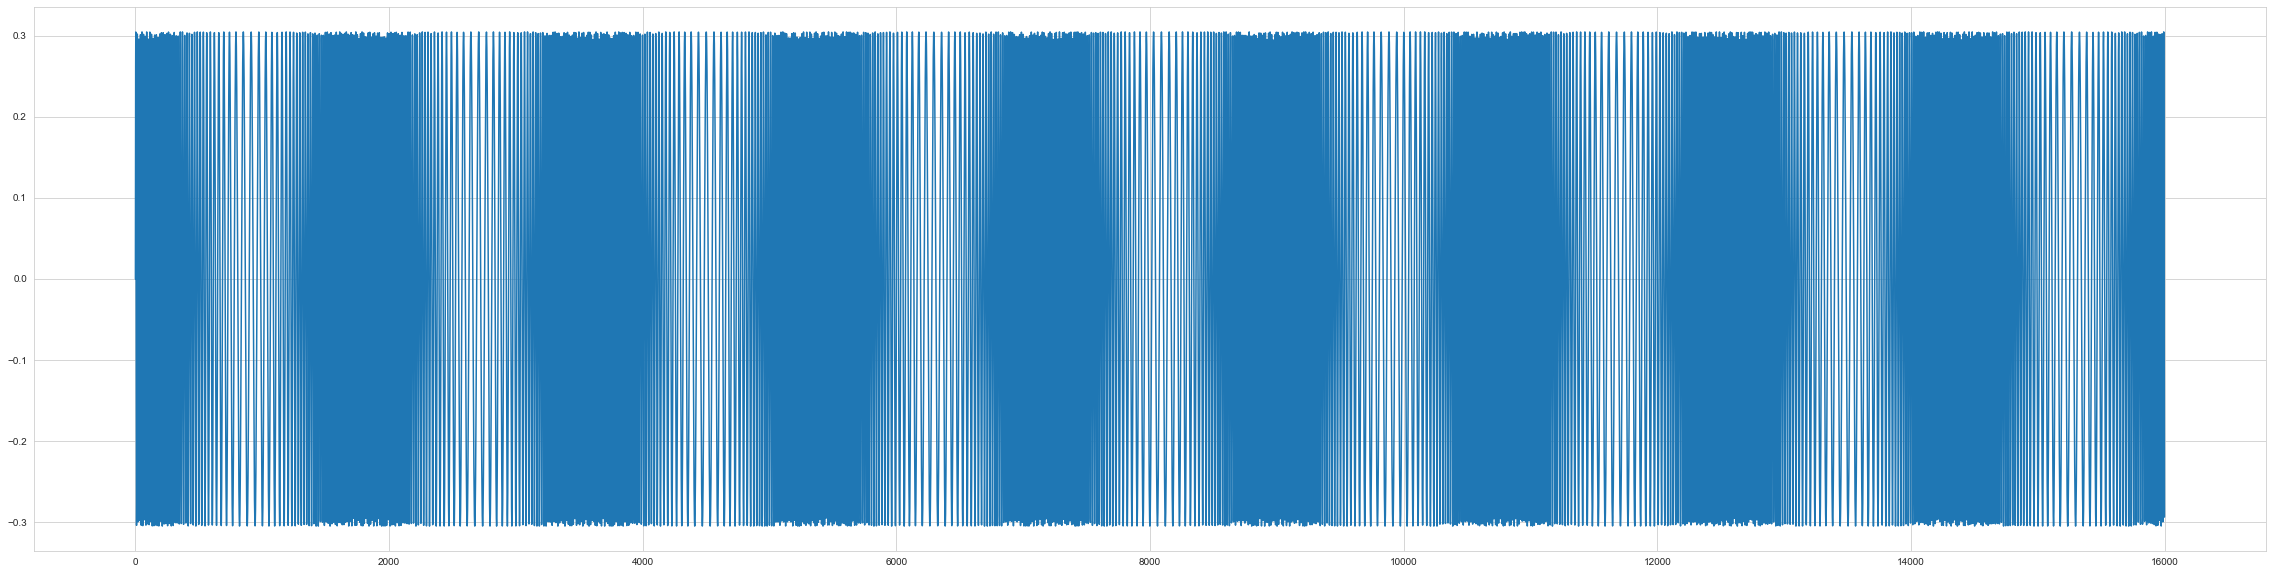

In [12]:
idx = 75

params = get_params_dict_from_df(params_df, idx)
signal, _ = torchaudio.load(wav_file_paths[idx])

np_signal = signal.numpy().squeeze()

fig, ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(np_signal)
plt.show()


tensor(False)


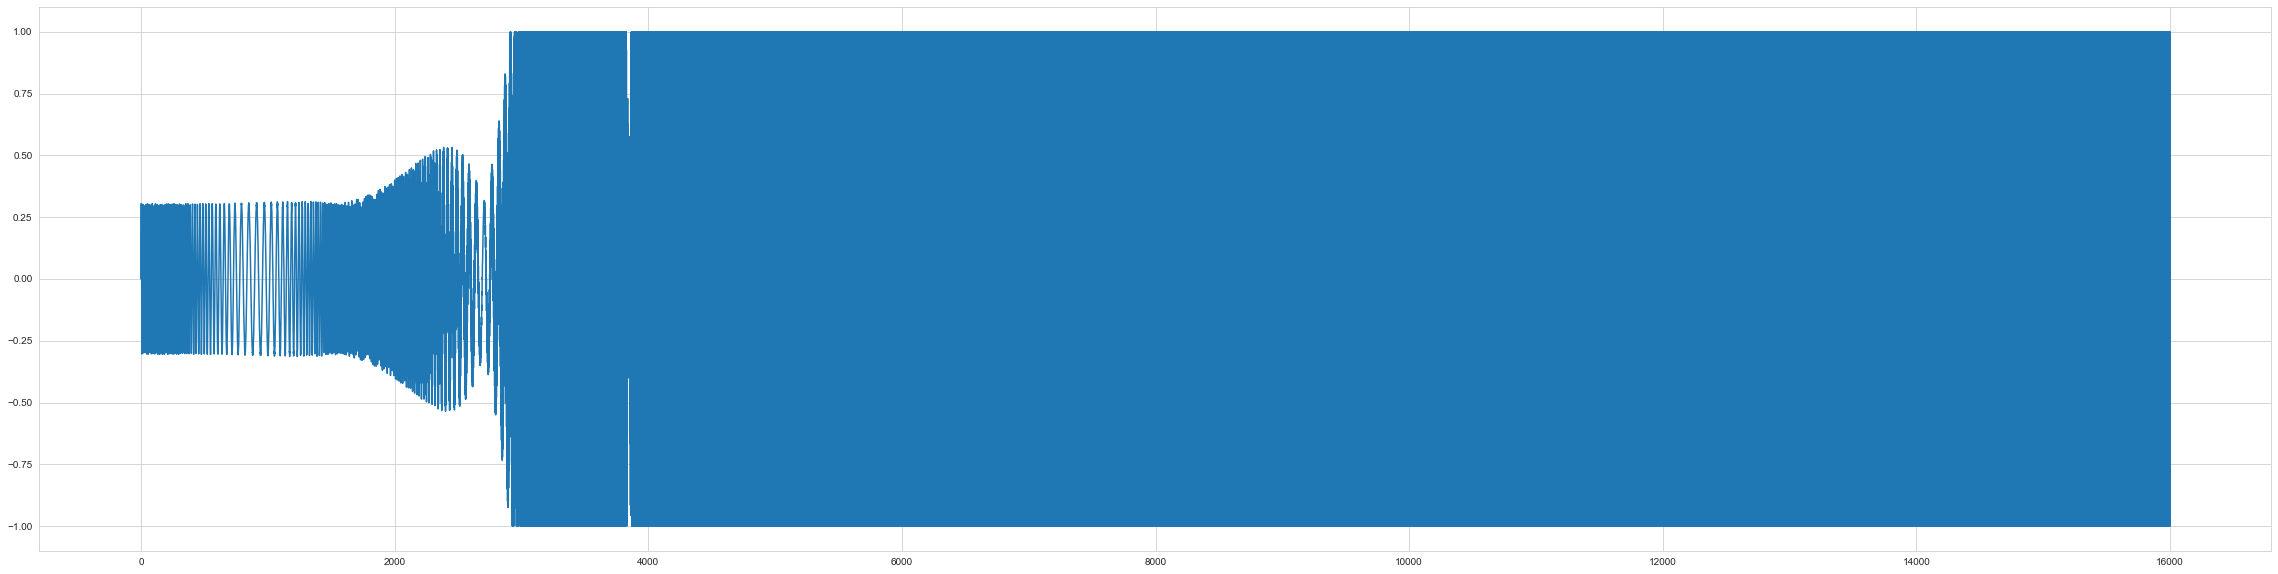

In [26]:
filtered_sound = lowpass_biquad(signal, 16000, 8010)
np_filtered_sound = filtered_sound.numpy().squeeze()

print(torch.any(torch.isnan(filtered_sound)))

fig, ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(np_filtered_sound)
plt.show()

